In [1]:
import pandas as pd
data = pd.read_csv("C:/Users/nafih/DM&ML/merged_dataset.csv")

In [2]:
data.head()

,filename,chroma_stft_mean,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,...,mfcc_mean_13,mfcc_mean_14,mfcc_mean_15,mfcc_mean_16,mfcc_mean_17,mfcc_mean_18,mfcc_mean_19,mfcc_mean_20,patient_id,diagnosis
0,102_1b1_Ar_sc_Meditron_0.wav,0.254787,0.008844,87.791015,303.219544,124.015299,0.000326,-659.56510,36.309616,15.127930,...,2.636771,2.007286,0.909843,0.572723,1.634796,2.737280,2.402194,1.253647,102,Healthy
1,102_1b1_Ar_sc_Meditron_1.wav,0.263624,0.006503,97.293962,334.340757,129.847209,0.000615,-705.90990,47.482037,17.021402,...,2.303964,1.750994,0.254522,-0.135599,1.466839,2.882954,2.165497,0.586369,102,Healthy
2,102_1b1_Ar_sc_Meditron_10.wav,0.248261,0.005775,106.060551,344.011801,154.720052,0.000814,-720.24207,43.669025,20.418701,...,2.468011,1.484309,0.633198,0.681082,1.520986,2.345665,2.233439,1.363734,102,Healthy
3,102_1b1_Ar_sc_Meditron_11.wav,0.280037,0.007113,110.661336,375.528213,148.539225,0.000886,-702.58350,48.477226,20.681759,...,2.750497,2.302541,1.237310,0.689132,1.559121,2.490690,2.311563,1.782760,102,Healthy
4,102_1b1_Ar_sc_Meditron_12.wav,0.072260,0.002828,54.266237,116.708616,120.875041,0.000235,-723.61536,14.791463,6.606128,...,0.117115,-0.014951,-0.072751,0.018357,0.261618,0.473723,0.516150,0.461364,102,Healthy


In [3]:
features = data.drop(columns = ['filename', 'patient_id', 'diagnosis'])
target = data['diagnosis']

In [4]:
features.head()

,chroma_stft_mean,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,...,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,mfcc_mean_14,mfcc_mean_15,mfcc_mean_16,mfcc_mean_17,mfcc_mean_18,mfcc_mean_19,mfcc_mean_20
0,0.254787,0.008844,87.791015,303.219544,124.015299,0.000326,-659.56510,36.309616,15.127930,4.915226,...,2.430237,2.702271,2.636771,2.007286,0.909843,0.572723,1.634796,2.737280,2.402194,1.253647
1,0.263624,0.006503,97.293962,334.340757,129.847209,0.000615,-705.90990,47.482037,17.021402,5.379830,...,1.588329,1.906406,2.303964,1.750994,0.254522,-0.135599,1.466839,2.882954,2.165497,0.586369
2,0.248261,0.005775,106.060551,344.011801,154.720052,0.000814,-720.24207,43.669025,20.418701,8.824766,...,1.584186,2.604331,2.468011,1.484309,0.633198,0.681082,1.520986,2.345665,2.233439,1.363734
3,0.280037,0.007113,110.661336,375.528213,148.539225,0.000886,-702.58350,48.477226,20.681759,8.251365,...,2.831473,2.998604,2.750497,2.302541,1.237310,0.689132,1.559121,2.490690,2.311563,1.782760
4,0.072260,0.002828,54.266237,116.708616,120.875041,0.000235,-723.61536,14.791463,6.606128,2.557440,...,0.401402,0.304459,0.117115,-0.014951,-0.072751,0.018357,0.261618,0.473723,0.516150,0.461364


In [5]:
target.value_counts()

COPD              5746
Healthy            322
Pneumonia          285
URTI               220
Bronchiolitis      160
Bronchiectasis     104
LRTI                32
Asthma               6
Name: diagnosis, dtype: int64

In [6]:
#Splitting the data set for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [7]:
y_train.value_counts()

COPD              4017
Healthy            233
Pneumonia          208
URTI               154
Bronchiolitis      110
Bronchiectasis      66
LRTI                21
Asthma               3
Name: diagnosis, dtype: int64

In [8]:
#Oversamplinf the training data set
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(k_neighbors=2, random_state=42)  
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)
print('After Oversampling')
y_train_oversampled.value_counts()

After Oversampling


COPD              4017
Healthy           4017
Pneumonia         4017
Bronchiolitis     4017
Bronchiectasis    4017
URTI              4017
LRTI              4017
Asthma            4017
Name: diagnosis, dtype: int64

In [9]:
X_train_oversampled.shape

(32136, 26)

In [17]:
#Tuning the hyperparameters using GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15]
}
#Creating a decision tree model and training the model
dt_model = DecisionTreeClassifier(random_state = 42)
grid_search = GridSearchCV(dt_model, param_grid, cv = 3, n_jobs = -1, verbose  = 2)
grid_search.fit(X_train_oversampled, y_train_oversampled)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15]},
             verbose=2)

In [18]:
#printing the parameters of best decision tree model
best_fit = grid_search.best_params_
print("Best Parameters:", best_fit)

Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [19]:
from sklearn.metrics import classification_report, accuracy_score
# Evaluate the model
best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test)
#Calculationg accuracy and classification report
print(classification_report(y_test, y_pred, zero_division=1))
print("Accuracy:", accuracy_score(y_test, y_pred))

                precision    recall  f1-score   support

        Asthma       1.00      0.00      0.00         3
Bronchiectasis       0.32      0.82      0.46        38
 Bronchiolitis       0.13      0.56      0.22        50
          COPD       0.97      0.78      0.87      1729
       Healthy       1.00      0.00      0.00        89
          LRTI       0.19      0.64      0.29        11
     Pneumonia       0.19      0.68      0.30        77
          URTI       0.07      0.08      0.07        66

      accuracy                           0.71      2063
     macro avg       0.49      0.44      0.28      2063
  weighted avg       0.88      0.71      0.75      2063

Accuracy: 0.7130392632089191


In [20]:
#finding the confusion matrix of decision tree model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[   0    0    0    3    0    0    0    0]
 [   0   31    3    0    0    0    0    4]
 [   0    6   28    2    0    2   11    1]
 [   0   56  108 1348    0   15  143   59]
 [   0    3   30   10    0    3   43    0]
 [   0    0    0    0    0    7    4    0]
 [   0    0   12   11    0    2   52    0]
 [   0    1   27    9    0    8   16    5]]


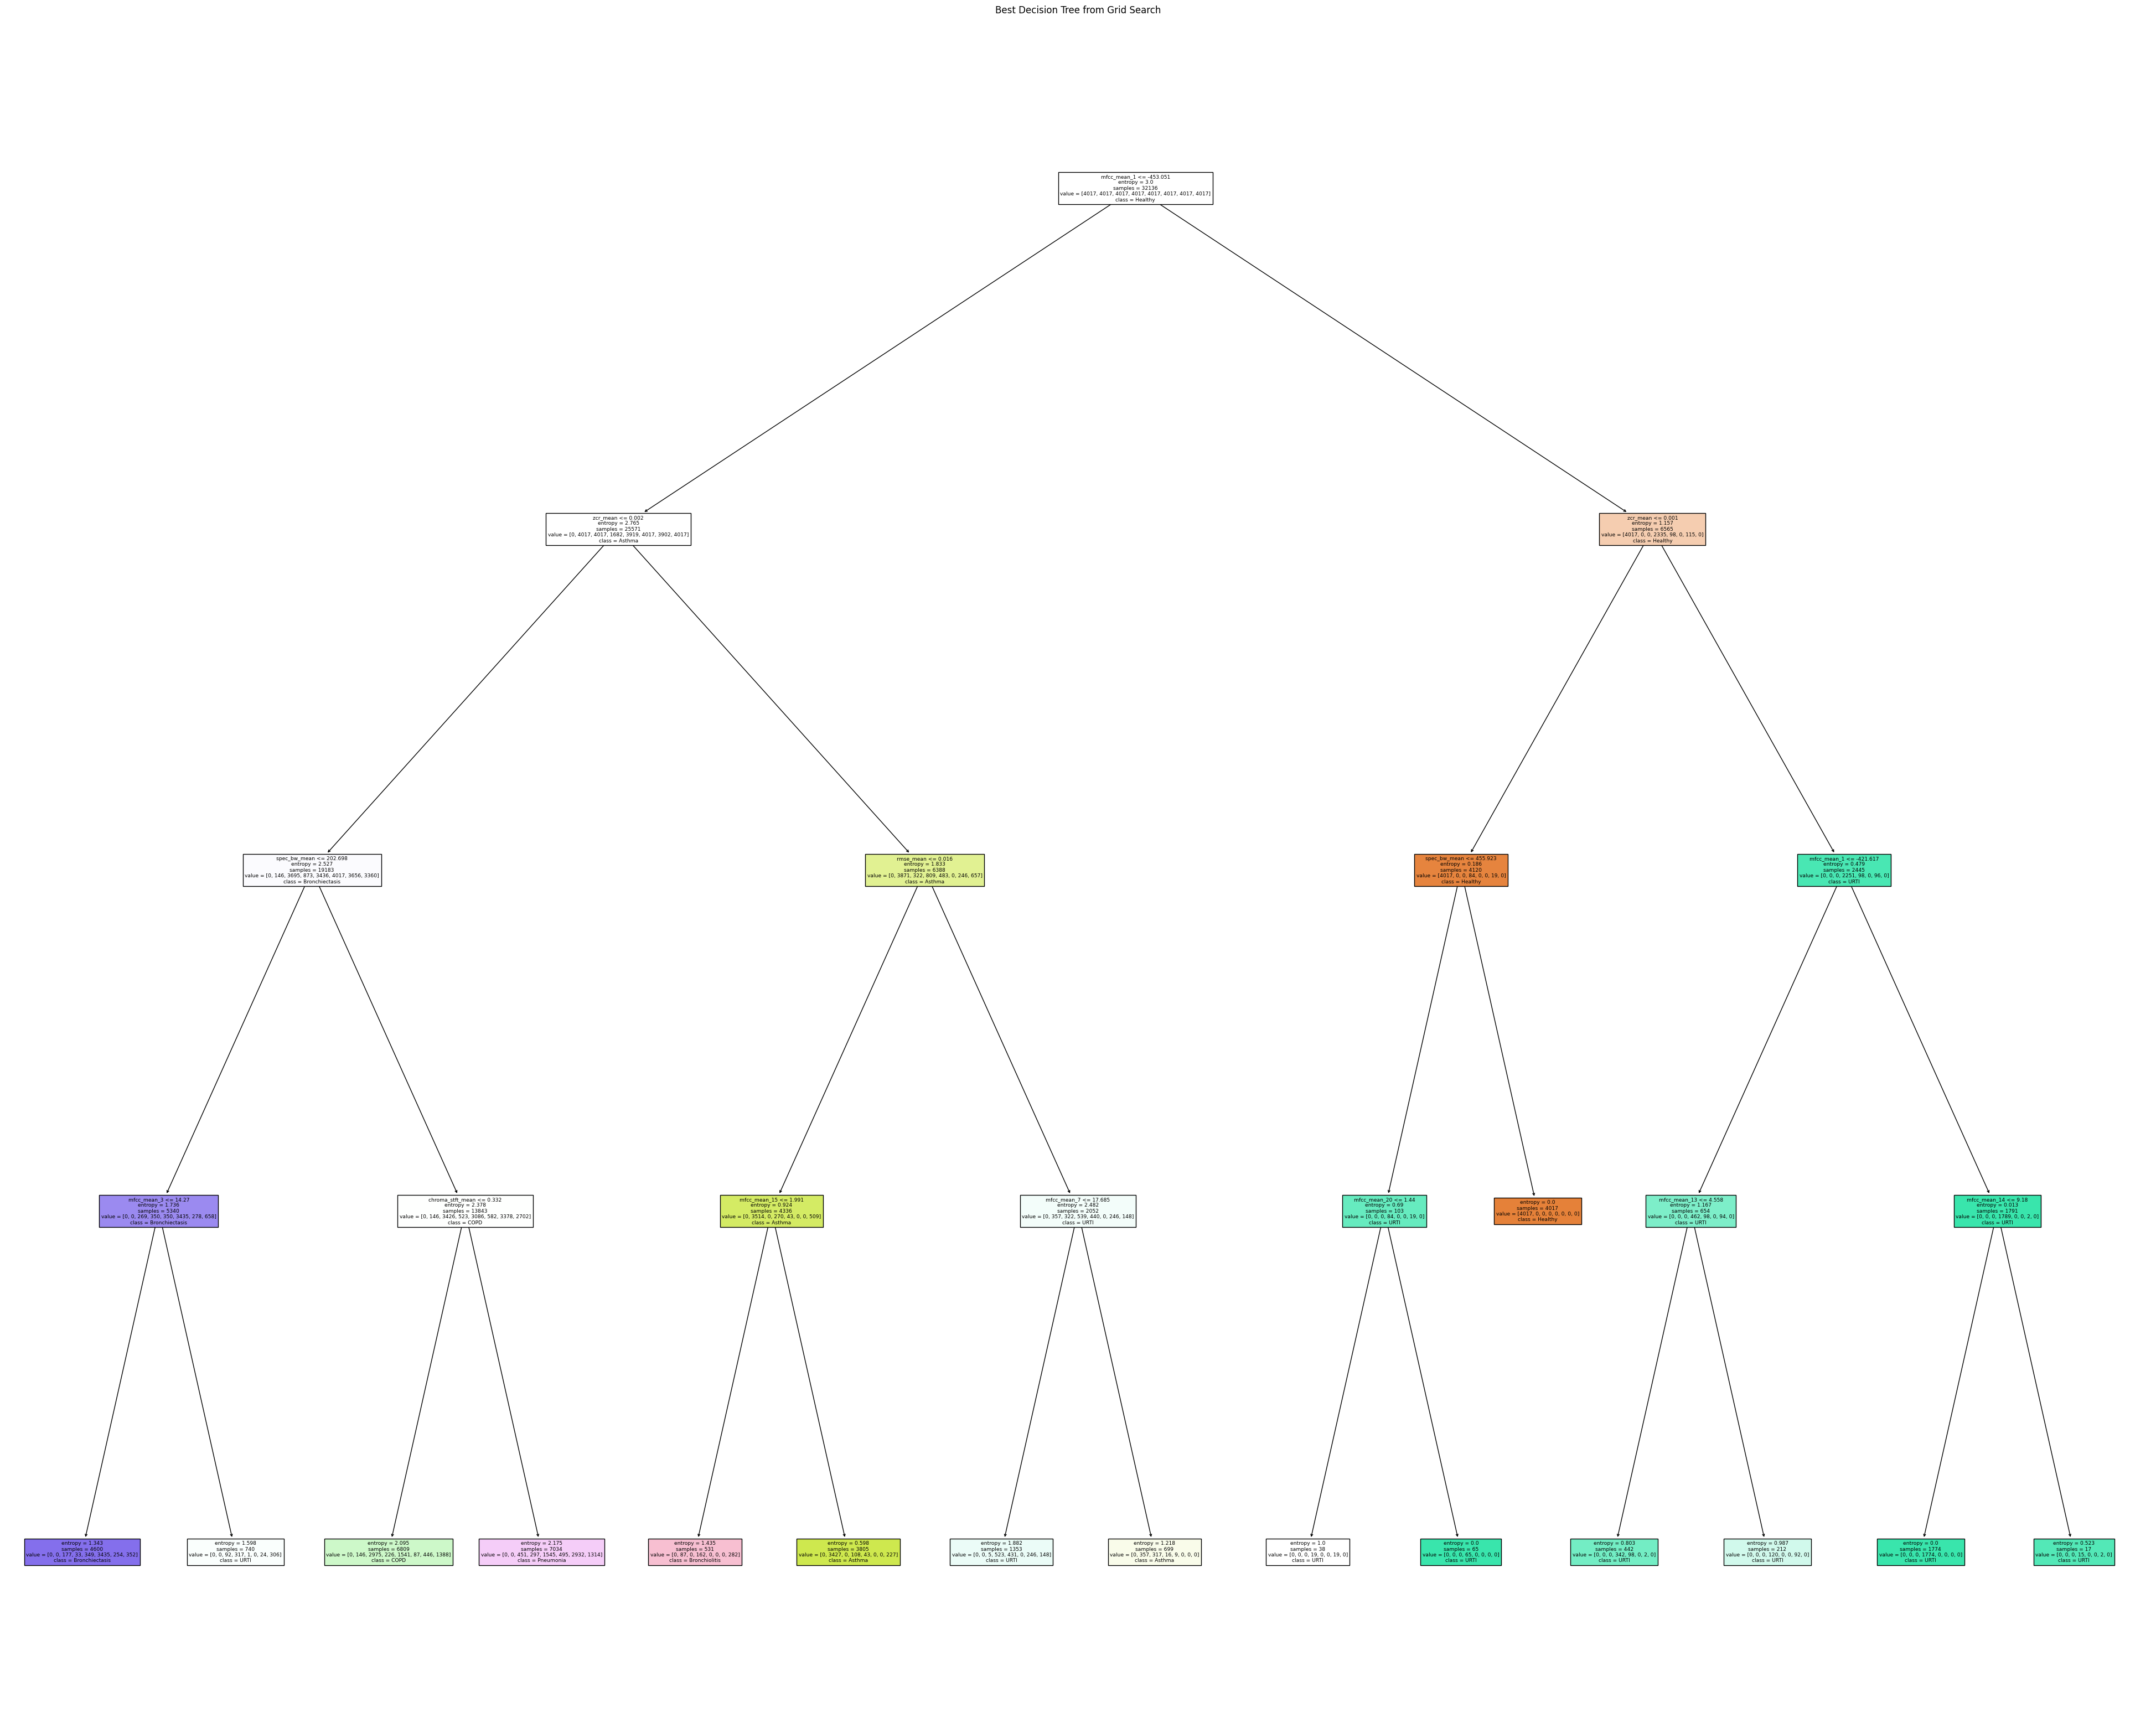

In [22]:
# Plotting the best decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 40))
plot_tree(best_dt_model, filled=True, feature_names = features.columns, class_names = target.unique())
plt.title("Best Decision Tree from Grid Search")
plt.show()


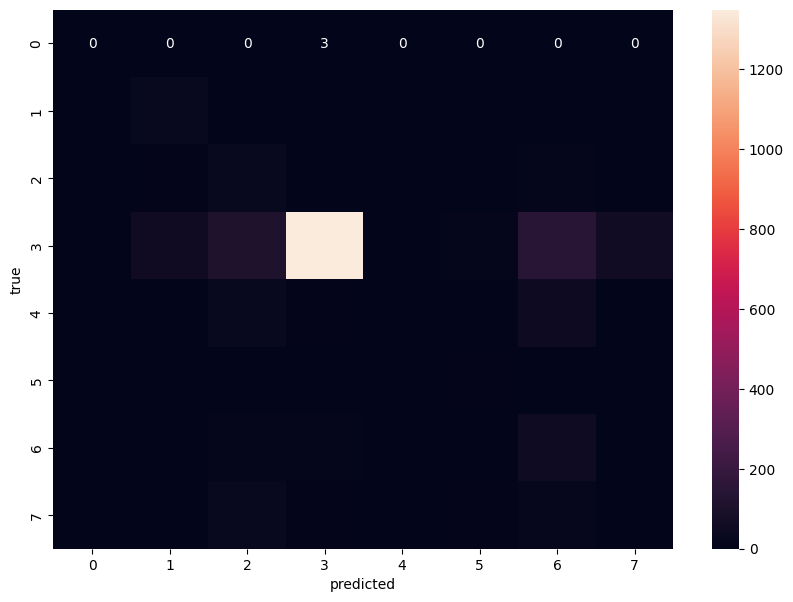

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()